In [1]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [3]:
def load_data(dir_name: str, file_name: str, sheet_name: str) -> pd.DataFrame:
    _df = pd.read_excel('{}/{}'.format(dir_name, file_name), sheet_name = sheet_name)
    _df = _df.set_index('Unnamed: 0')

    # data cleansing
    _df.index = [s.strip() for s in _df.index]
    _df.columns = [s.strip() for s in _df.columns]

    # Validation
    assert _df.shape == (1000, 1000)
    assert list(_df.index) == list(_df.columns)

    return _df

In [4]:
def df_to_graph(df: pd.DataFrame) -> nx.Graph:
    _graph = nx.from_pandas_adjacency(df)
    assert _graph.number_of_nodes() == 1000
    return _graph

In [7]:
dir_name = './sample_data'
service_names = ['Facebook','Twitter','Instagram']
file_names = ['{}_Data.xlsx'.format(service_name) for service_name in service_names]
sheet_name = 'Sheet1'

fb_df, tw_df, ig_df = [load_data(dir_name, file_name, sheet_name) for file_name in file_names]
ensembled_df = fb_df + tw_df + ig_df
# ensembled_df = fb_df * tw_df * ig_df

graph_list = [df_to_graph(df) for df in [fb_df, tw_df, ig_df, ensembled_df]]
fb_graph, tw_graph, ig_graph, ensembled_graph = graph_list
service_names += ['Ensembled']

In [8]:
# All graph is undirected
for _df in [fb_df, tw_df, ig_df]:
    assert np.mean([list(_df[key]) == list(_df.transpose()[key]) for key in _df.index]) == 1.0

In [9]:
fb_df

,Meredith Stransky,Brittney Mazzella,Yi Cook,Porter Devries,Suzanne Syverson,Ladawn Creason,Mikel Lamberson,Lakendra Lasiter,Kate Shiver,Sharika Aiken,...,Tehmina,Happy Bacha,Younus,AVA,Alfred,Danish,Matloob,Sameed Shahzad,Frazer,Mubashir
Meredith Stransky,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Brittney Mazzella,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
Yi Cook,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
Porter Devries,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Suzanne Syverson,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Danish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Matloob,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sameed Shahzad,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Frazer,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
_, axes = plt.subplots(ncols = 4, figsize = (400, 100))
for (index, (service_name, graph)) in enumerate(zip(service_names, graph_list)):
    axes[index].set_title(service_name, fontsize = 200)
    nx.draw(graph, node_size = 1, ax = axes[index])

In [11]:
def degree_list(graph: nx.Graph) -> list:
    return list(dict(graph.degree()).values())

def degree_analysis(graph: nx.Graph) -> tuple:
    _degree_list = degree_list(graph)
    return round(np.mean(_degree_list), 3), max(_degree_list), min(_degree_list)

result_df = pd.DataFrame(
    index = service_names,
    columns = ['Node', 'Edge', 'Average Distance', 'Average Clustering', 'Average Degree', 'Max Degree', 'Min Degree']
)

result_df['Node'] = [graph.number_of_nodes() for graph in graph_list]
result_df['Edge'] = [graph.number_of_edges() for graph in graph_list]
result_df['Average Distance'] = [round(nx.average_shortest_path_length(graph), 3) for graph in graph_list]
result_df['Average Clustering'] = [round(nx.average_clustering(graph), 3) for graph in graph_list]
result_df[['Average Degree', 'Max Degree', 'Min Degree']] = [degree_analysis(graph) for graph in graph_list]
result_df

,Node,Edge,Average Distance,Average Clustering,Average Degree,Max Degree,Min Degree
Facebook,1000,50153,1.900,0.100,100.306,127.0,64.0
Twitter,1000,250315,1.499,0.501,500.630,545.0,445.0
Instagram,1000,4933,3.273,0.009,9.866,20.0,2.0
Ensembled,1000,277506,1.444,0.556,555.012,606.0,504.0


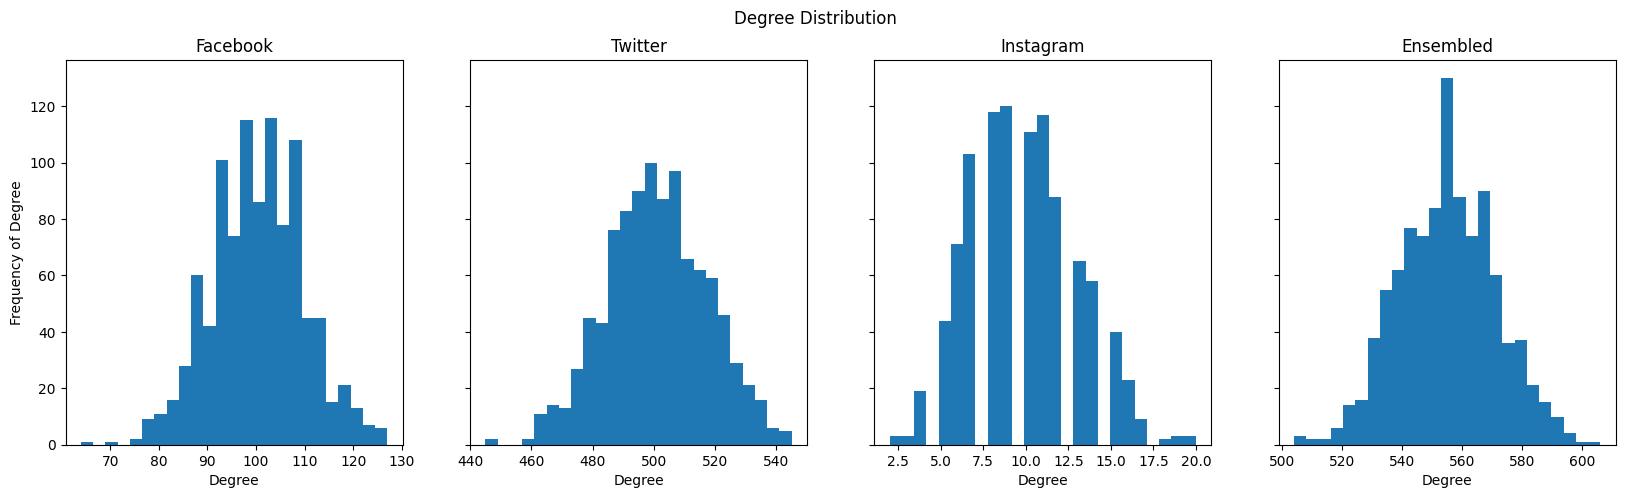

In [12]:
fig, axes = plt.subplots(ncols = 4, figsize = (20, 5), sharey = True)
fig.suptitle('Degree Distribution')

for (index, (service_name, graph)) in enumerate(zip(service_names, graph_list)):
    axes[index].hist(degree_list(graph), bins=25)
    axes[index].set_title(service_name)
    axes[index].set_xlabel('Degree')
    if index == 0:
        axes[index].set_ylabel('Frequency of Degree')

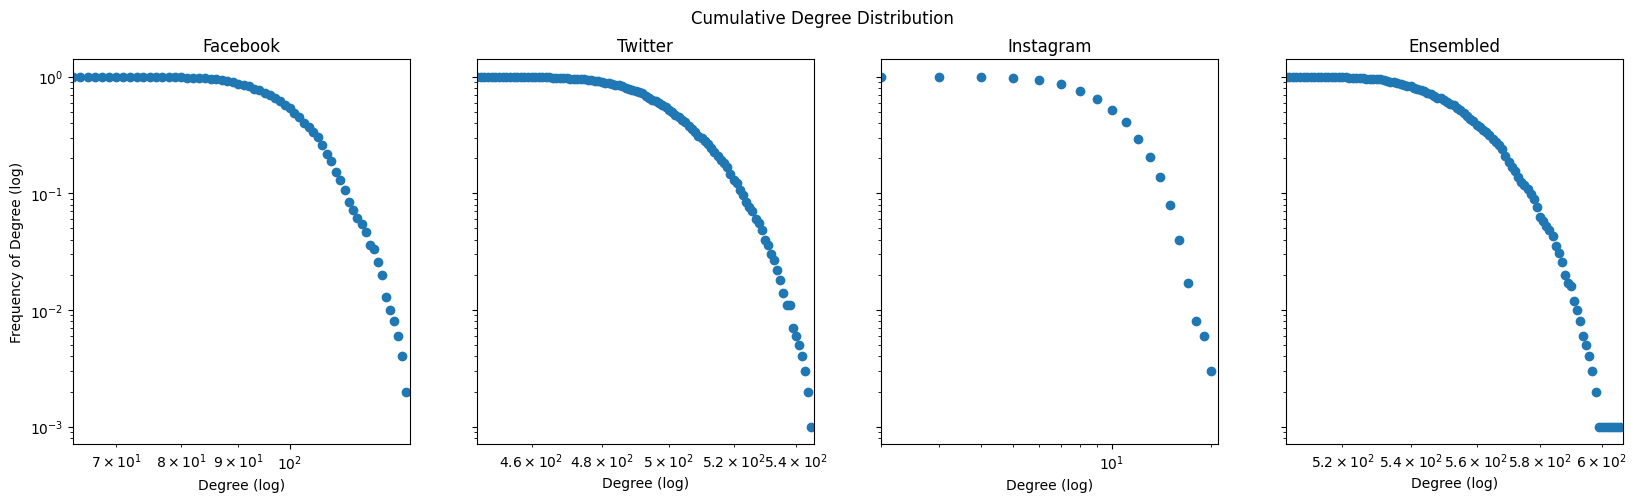

In [13]:
fig, axes = plt.subplots(ncols = 4, figsize = (20, 5), sharey = True)
fig.suptitle('Cumulative Degree Distribution')

for (index, (service_name, graph)) in enumerate(zip(service_names, graph_list)):
    n = int(result_df.loc[service_name]['Node'])
    min_degree = int(result_df.loc[service_name]['Min Degree'])
    max_degree = int(result_df.loc[service_name]['Max Degree'])

    xs = list(range(min_degree, max_degree + 1))
    ys = [len([degree for degree in degree_list(graph) if degree >= x]) / n for x in xs]
    axes[index].scatter(xs, ys)
    axes[index].set_title(service_name)
    axes[index].set_xlim(min_degree, max_degree + 1)
    axes[index].set_xlabel('Degree (log)')
    if index == 0:
        axes[index].set_ylabel('Frequency of Degree (log)')
    axes[index].set_xscale('log')
    axes[index].set_yscale('log')

In [14]:
def centrality(_func, service_names: list, graph_list: list) -> pd.DataFrame:
    centrality_dict_list = [_func(graph) for graph in graph_list]
    centrality_sr_list = [pd.Series(centrality_dict.values(), index = centrality_dict.keys()) for centrality_dict in centrality_dict_list]

    _df = pd.DataFrame(index = centrality_dict_list[0].keys(), columns = service_names)
    for (service_name, centrality_sr) in zip(service_names, centrality_sr_list):
        _df[service_name] = centrality_sr

    return _df

In [15]:
degree_centrality_df = centrality(nx.degree_centrality, service_names[0:3], graph_list[0:3])
closeness_centrality_df = centrality(nx.closeness_centrality, service_names[0:3], graph_list[0:3])

,Facebook,Twitter,Instagram
Facebook,1.000000,-0.066848,0.034104
Twitter,-0.066848,1.000000,0.018215
Instagram,0.034104,0.018215,1.000000


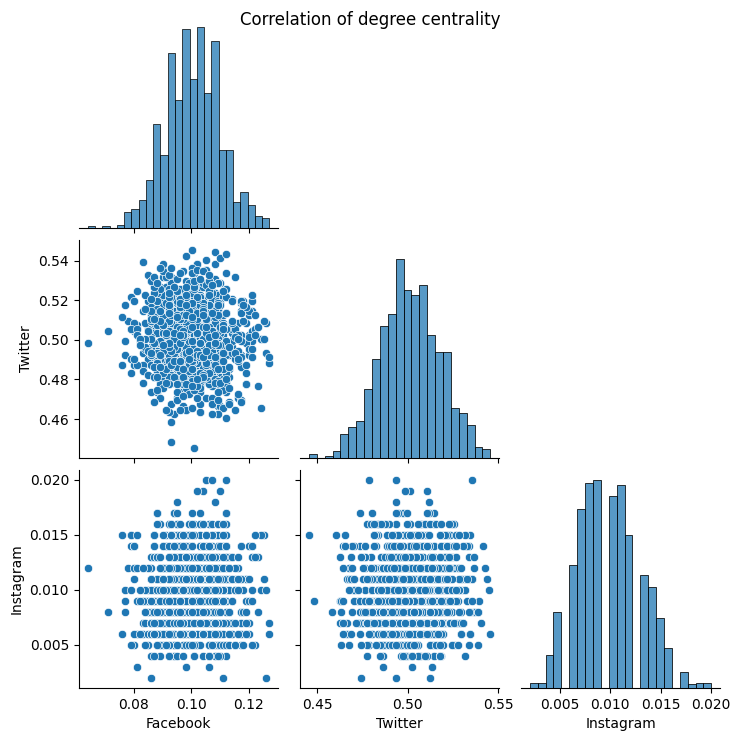

In [16]:
g = sns.pairplot(degree_centrality_df, corner = True)
g.fig.suptitle('Correlation of degree centrality')
degree_centrality_df.corr()

,Facebook,Twitter,Instagram
Facebook,1.000000,-0.066945,0.039569
Twitter,-0.066945,1.000000,0.028034
Instagram,0.039569,0.028034,1.000000


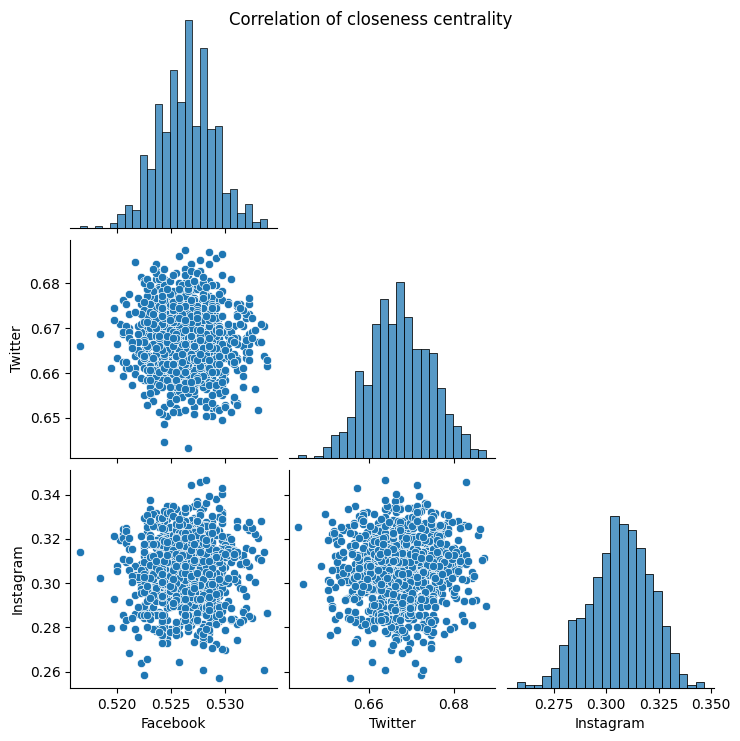

In [17]:
g = sns.pairplot(closeness_centrality_df, corner=True)
g.fig.suptitle('Correlation of closeness centrality')
closeness_centrality_df.corr()

In [18]:
comp = nx.algorithms.community.girvan_newman(fb_graph)

In [19]:
comp

<generator object girvan_newman at 0x7fb0d34aeff0>